In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from influxdb import InfluxDBClient
client = InfluxDBClient(host='localhost', port=8086)

client.switch_database('binance_trade')
q='select * from binance_trade.autogen.binance_trade'
binance_trade = pd.DataFrame(client.query(q).get_points())

client.switch_database('bitfinex_trade')
q='select * from bitfinex_trade.autogen.bitfinex_trade'
bitfinex_trade = pd.DataFrame(client.query(q).get_points())

client.switch_database('coinbase_trade')
q='select * from coinbase_trade.autogen.coinbase_trade'
coinbase_trade = pd.DataFrame(client.query(q).get_points())

client.switch_database('binance_order')
q='select * from binance_order.autogen.binance_order'
binance_order = pd.DataFrame(client.query(q).get_points())

client.switch_database('bitfinex_order')
q='select * from bitfinex_order.autogen.bitfinex_order'
bitfinex_order = pd.DataFrame(client.query(q).get_points())

client.switch_database('coinbase_or')
q='select * from coinbase_or.autogen.coinbase_order'
coinbase_order = pd.DataFrame(client.query(q).get_points())

In [ ]:
binance_order = binance_order.iloc[:,1:4]
bitfinex_order = bitfinex_order.iloc[:,1:4]
coinbase_order = coinbase_order.iloc[:,1:4]
binance_trade = binance_trade.iloc[:,1:3]
bitfinex_trade = bitfinex_trade.iloc[:,1:3]
coinbase_trade = coinbase_trade.iloc[:,1:3]

In [ ]:
binance_order['date'] = binance_order['date'].astype(str)
bitfinex_order['date'] = bitfinex_order['date'].astype(str)
coinbase_order['date'] = coinbase_order['date'].astype(str)
binance_trade['date'] = binance_trade['date'].astype(str)
bitfinex_trade['timestamp'] = bitfinex_trade['timestamp'].astype(str)
coinbase_trade['date'] = coinbase_trade['date'].astype(str)

In [ ]:
binance_order['date'] = binance_order['date'].str[:-5]
bitfinex_order['date'] = bitfinex_order['date'].str[:-2]
coinbase_order['date'] = coinbase_order['date'].str[:-2]
binance_trade['date'] = binance_trade['date'].str[:-2]
bitfinex_trade['timestamp'] = bitfinex_trade['timestamp'].str[:-2]
coinbase_trade['date'] = coinbase_trade['date'].str[:-2]

In [ ]:
data_frames = [binance_order, bitfinex_order, coinbase_order, binance_trade, bitfinex_trade, coinbase_trade]

In [ ]:
from functools import reduce
crypto_merged = reduce(lambda  left,right: pd.merge(left,right,on=['date'],
                                            how='outer'), data_frames)

In [ ]:
crypto = crypto_merged.dropna()

In [ ]:
crypto = crypto.reset_index()

In [ ]:
crypto = crypto.iloc[:,1:12]

In [ ]:
crypto

,binance_asks,binance_bids,date,bitfinex_asks,bitfinex_bids,coinbase_asks,coinbase_bids,binance_tr,bitfinex_tr,coinbase_tr
0,0.027048,0.027048,1609195957,0.02704,0.02702,0.02707,0.02706,0.027099,0.027093,0.02707
1,0.027050,0.027050,1609195959,0.02704,0.02703,0.02707,0.02706,0.027101,0.027077,0.02702
2,0.027067,0.027067,1609195961,0.02704,0.02703,0.02707,0.02706,0.027105,0.027077,0.02702
3,0.027089,0.027089,1609195962,0.02709,0.02706,0.02709,0.02708,0.027087,0.027093,0.02707
4,0.027109,0.027109,1609195964,0.02709,0.02707,0.02710,0.02709,0.027110,0.027093,0.02707
...,...,...,...,...,...,...,...,...,...,...
10032,0.027304,0.027304,1609239248,0.02733,0.02731,0.02732,0.02731,0.027300,0.027305,0.02725
10033,0.027302,0.027302,1609239257,0.02731,0.02730,0.02732,0.02731,0.027300,0.027305,0.02725
10034,0.027299,0.027299,1609239267,0.02731,0.02730,0.02731,0.02730,0.027300,0.027305,0.02725
10035,0.027299,0.027299,1609239276,0.02731,0.02730,0.02732,0.02731,0.027316,0.027305,0.02725


In [ ]:
bids = crypto.iloc[:,[1,4,6]]
asks = crypto.iloc[:,[0,3,5]]

In [ ]:
bids

,binance_bids,bitfinex_bids,coinbase_bids
0,0.027048,0.02702,0.02706
1,0.027050,0.02703,0.02706
2,0.027067,0.02703,0.02706
3,0.027089,0.02706,0.02708
4,0.027109,0.02707,0.02709
...,...,...,...
10032,0.027304,0.02731,0.02731
10033,0.027302,0.02730,0.02731
10034,0.027299,0.02730,0.02730
10035,0.027299,0.02730,0.02731


In [ ]:
bids = np.array(bids)
asks = np.array(asks)

In [ ]:
bids_list = []
asks_list = []

max_bids = []
min_asks = []

for i in range(crypto.shape[0]):
  bids_list.append(bids[i,:])
  asks_list.append(asks[i,:])

  max_bids.append(max(bids_list[i]))
  min_asks.append(min(asks_list[i]))

In [ ]:
labels = []
ones = 0
zero = 0
for i in range(np.array(max_bids).shape[0]):

  if max_bids[i] - min_asks[i] > min_asks[i]*0.001:  
    labels.append(1)
    ones += 1
  else:
    labels.append(0)
    zero += 1

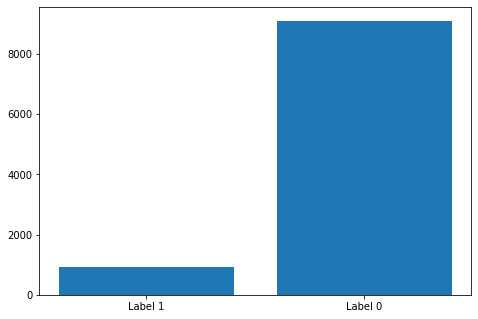

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Labels = ['Label 1', 'Label 0']
Values = [ones, zero]
ax.bar(Labels, Values)
plt.show()

In [ ]:
crypto['Labels'] = labels

In [ ]:
crypto

,binance_asks,binance_bids,date,bitfinex_asks,bitfinex_bids,coinbase_asks,coinbase_bids,binance_tr,bitfinex_tr,coinbase_tr,Labels
0,0.027048,0.027048,1609195957,0.02704,0.02702,0.02707,0.02706,0.027099,0.027093,0.02707,0
1,0.027050,0.027050,1609195959,0.02704,0.02703,0.02707,0.02706,0.027101,0.027077,0.02702,0
2,0.027067,0.027067,1609195961,0.02704,0.02703,0.02707,0.02706,0.027105,0.027077,0.02702,0
3,0.027089,0.027089,1609195962,0.02709,0.02706,0.02709,0.02708,0.027087,0.027093,0.02707,0
4,0.027109,0.027109,1609195964,0.02709,0.02707,0.02710,0.02709,0.027110,0.027093,0.02707,0
...,...,...,...,...,...,...,...,...,...,...,...
10032,0.027304,0.027304,1609239248,0.02733,0.02731,0.02732,0.02731,0.027300,0.027305,0.02725,0
10033,0.027302,0.027302,1609239257,0.02731,0.02730,0.02732,0.02731,0.027300,0.027305,0.02725,0
10034,0.027299,0.027299,1609239267,0.02731,0.02730,0.02731,0.02730,0.027300,0.027305,0.02725,0
10035,0.027299,0.027299,1609239276,0.02731,0.02730,0.02732,0.02731,0.027316,0.027305,0.02725,0


In [ ]:
modeling_data = crypto.iloc[:,[0, 3, 5, 7, 8, 9, 10]]

In [ ]:
modeling_data

,binance_asks,bitfinex_asks,coinbase_asks,binance_tr,bitfinex_tr,coinbase_tr,Labels
0,0.027048,0.02704,0.02707,0.027099,0.027093,0.02707,0
1,0.027050,0.02704,0.02707,0.027101,0.027077,0.02702,0
2,0.027067,0.02704,0.02707,0.027105,0.027077,0.02702,0
3,0.027089,0.02709,0.02709,0.027087,0.027093,0.02707,0
4,0.027109,0.02709,0.02710,0.027110,0.027093,0.02707,0
...,...,...,...,...,...,...,...
10032,0.027304,0.02733,0.02732,0.027300,0.027305,0.02725,0
10033,0.027302,0.02731,0.02732,0.027300,0.027305,0.02725,0
10034,0.027299,0.02731,0.02731,0.027300,0.027305,0.02725,0
10035,0.027299,0.02731,0.02732,0.027316,0.027305,0.02725,0


In [ ]:
crypto_data = np.array(modeling_data)

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
crypto_data = scaler.fit_transform(crypto_data)

**Train and Test Split**

In [ ]:
train_x = []
test_x = []
train_y = []
test_y = []

train_x = crypto_data[:8000,:6]
test_x = crypto_data[8000:,:6]

train_y = crypto_data[:8000,6]
test_y = crypto_data[8000:,6]


train_x, train_y, test_x, test_y = np.array(train_x), np.array(train_y), np.array(test_x), np.array(test_y)

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

**LSTM Modeling**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(train_x.shape[1], train_x.shape[2])))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm. compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit network

**Batch Size Tuning**

Epoch 1/100
225/225 [==============================] - 3s 6ms/step - loss: 0.4404 - accuracy: 0.8859 - val_loss: 0.3638 - val_accuracy: 0.8913
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2531 - accuracy: 0.9270 - val_loss: 0.3684 - val_accuracy: 0.8913
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.9279 - val_loss: 0.3627 - val_accuracy: 0.8913
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2404 - accuracy: 0.9332 - val_loss: 0.3612 - val_accuracy: 0.8913
Epoch 5/100
225/225 [==============================] - 1s 2ms/step - loss: 0.2482 - accuracy: 0.9299 - val_loss: 0.3579 - val_accuracy: 0.8913
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2545 - accuracy: 0.9248 - val_loss: 0.3654 - val_accuracy: 0.8913
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.2510 - accuracy: 0.9266 - val_loss: 0.3696 - val_accuracy: 0.8913

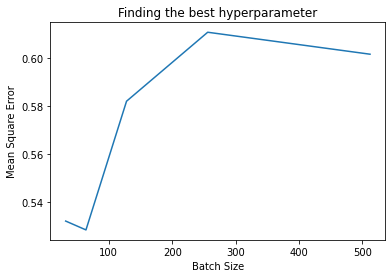

In [ ]:
import matplotlib.pyplot as plt
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    testScore = model.evaluate(X_test, y_test, verbose=0)
    return trainScore[0], testScore[0]

def quick_measure(batch):
    model = model_lstm
    model.fit(train_x, train_y, batch_size=batch, epochs=100, validation_split=0.1, verbose=1)
    trainScore, testScore = model_score(model, train_x, train_y, test_x, test_y)
    return trainScore, testScore

batchlist = [32, 64, 128, 256, 512]

batch_result = {}

for batch in batchlist:    
    trainScore, testScore = quick_measure(batch)
    batch_result[batch] = testScore

lists = sorted(batch_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Batch Size')
plt.ylabel('Mean Square Error')
plt.show()

**Epoch number setting**

Epoch 1/50
113/113 [==============================] - 1s 5ms/step - loss: 0.2423 - accuracy: 0.9271 - val_loss: 0.4147 - val_accuracy: 0.8913
Epoch 2/50
113/113 [==============================] - 1s 5ms/step - loss: 0.2417 - accuracy: 0.9271 - val_loss: 0.4244 - val_accuracy: 0.8913
Epoch 3/50
113/113 [==============================] - 0s 4ms/step - loss: 0.2424 - accuracy: 0.9271 - val_loss: 0.4188 - val_accuracy: 0.8913
Epoch 4/50
113/113 [==============================] - 0s 4ms/step - loss: 0.2427 - accuracy: 0.9271 - val_loss: 0.4196 - val_accuracy: 0.8913
Epoch 5/50
113/113 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9271 - val_loss: 0.4098 - val_accuracy: 0.8913
Epoch 6/50
113/113 [==============================] - 0s 4ms/step - loss: 0.2419 - accuracy: 0.9271 - val_loss: 0.4241 - val_accuracy: 0.8913
Epoch 7/50
113/113 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.9271 - val_loss: 0.4374 - val_accuracy: 0.8913
Epoch 

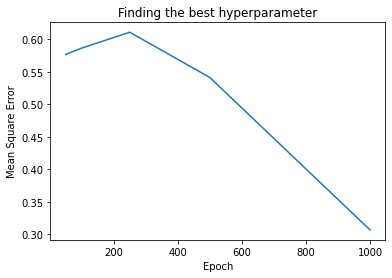

In [ ]:
import matplotlib.pyplot as plt
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    testScore = model.evaluate(X_test, y_test, verbose=0)
    return trainScore[0], testScore[0]

def quick_measure(epoch):
    model = model_lstm
    model.fit(train_x, train_y, batch_size=64, epochs=epoch, validation_split=0.1, verbose=1)
    trainScore, testScore = model_score(model, train_x, train_y, test_x, test_y)
    return trainScore, testScore

epochlist = [50, 100, 250, 500, 1000]

epoch_result = {}

for epoch in epochlist:    
    trainScore, testScore = quick_measure(epoch)
    epoch_result[epoch] = testScore

lists = sorted(epoch_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Epoch')
plt.ylabel('Mean Square Error')
plt.show()

In [174]:
history = model_lstm.fit(train_x, train_y, batch_size=64, epochs=1000, validation_split=0.1, verbose=1)

Epoch 1/1000
113/113 [==============================] - 1s 5ms/step - loss: 0.1231 - accuracy: 0.9546 - val_loss: 0.1878 - val_accuracy: 0.9438
Epoch 2/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.1214 - accuracy: 0.9593 - val_loss: 0.1813 - val_accuracy: 0.9463
Epoch 3/1000
113/113 [==============================] - 1s 4ms/step - loss: 0.1212 - accuracy: 0.9576 - val_loss: 0.1650 - val_accuracy: 0.9538
Epoch 4/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.1210 - accuracy: 0.9581 - val_loss: 0.1793 - val_accuracy: 0.9475
Epoch 5/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.1250 - accuracy: 0.9563 - val_loss: 0.1779 - val_accuracy: 0.9475
Epoch 6/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.1201 - accuracy: 0.9585 - val_loss: 0.2204 - val_accuracy: 0.9337
Epoch 7/1000
113/113 [==============================] - 0s 4ms/step - loss: 0.1222 - accuracy: 0.9578 - val_loss: 0.1825 - val_accuracy:

**Evaluation**

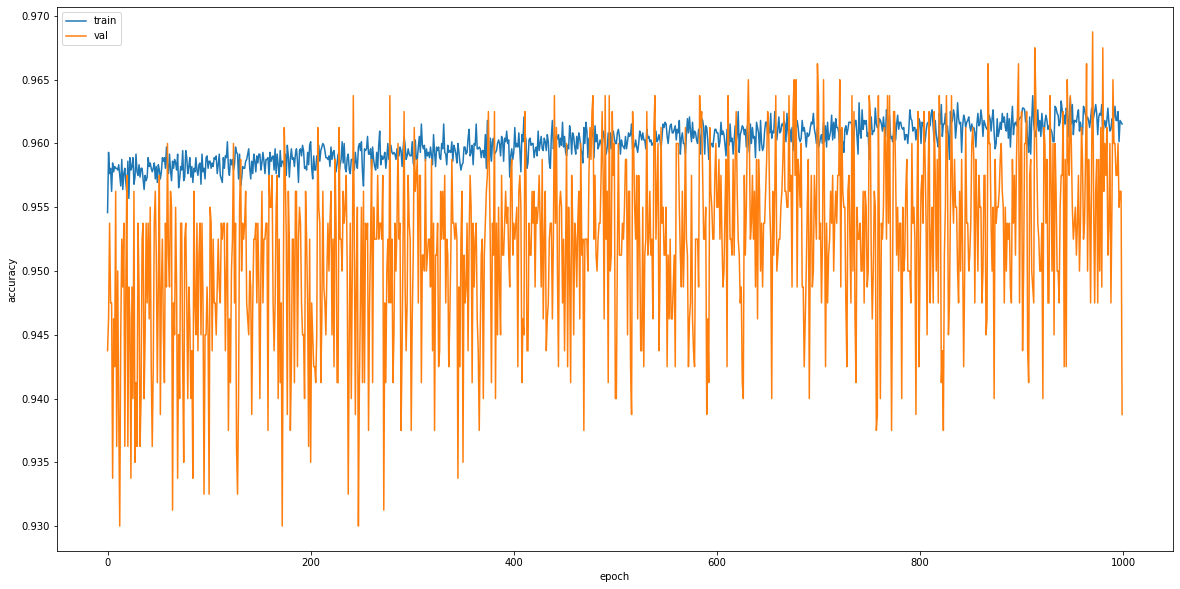

In [187]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.rcParams["figure.figsize"] = [10,5]
plt.show()

In [188]:
model_lstm.evaluate(test_x, test_y)

64/64 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.9057


[0.3913455307483673, 0.9057437181472778]